# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

Importing Required packages

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
import scipy.stats as st

plt.style.use('ggplot')

Storing datframe and assigning temperature column to an array

In [2]:
df = pd.read_csv('data/human_body_temperature.csv') # reading data to dataframe df

b_temp = df['temperature'] # storing temperature column to b_temp as a numpy array

## Part 1: Checking if body temperature follows a normal distribution

Calculating mean and standard deviation of temperature

In [3]:
mean_b_temp = np.mean(b_temp) # mean temperature

std_b_temp = np.std(b_temp) # std of temperature

Plotting histogram for temperature

<IPython.core.display.Javascript object>


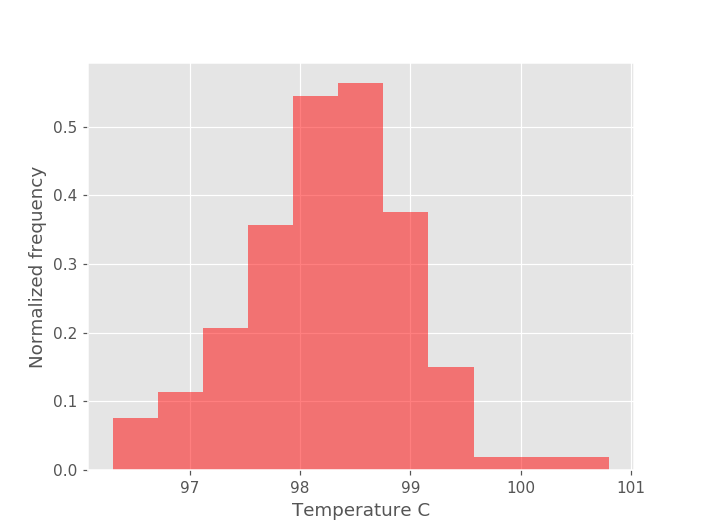

In [4]:
# plotting histogram
plt.hist(b_temp, 
         bins = int(np.sqrt(len(b_temp))), 
         normed = True, 
         alpha = 0.5, 
         color = 'red')

#labelling axis
plt.xlabel('Temperature C')
plt.ylabel('Normalized frequency');

**The histogram shows that temperature distribution might be normal. But, as the histogram is dependent on bin size, we need to confirm this with cumulative frequency distribution plot** 

Defining a function to caluclate cdf

In [5]:
def ecdf(data):
    """""
    Input: 
    Data to compute cdf for
    Output:
    cdf and x-axis values
    Compute CDF for 1D array.
    """""
    
    n = len(data) # Number of data points
    
    x = np.sort(data) # x-data for the CDF
    
    y = np.arange(1, n+1) / n # y-data for the ECDF

    return x, y

Calculating cdf and plotting it

<IPython.core.display.Javascript object>


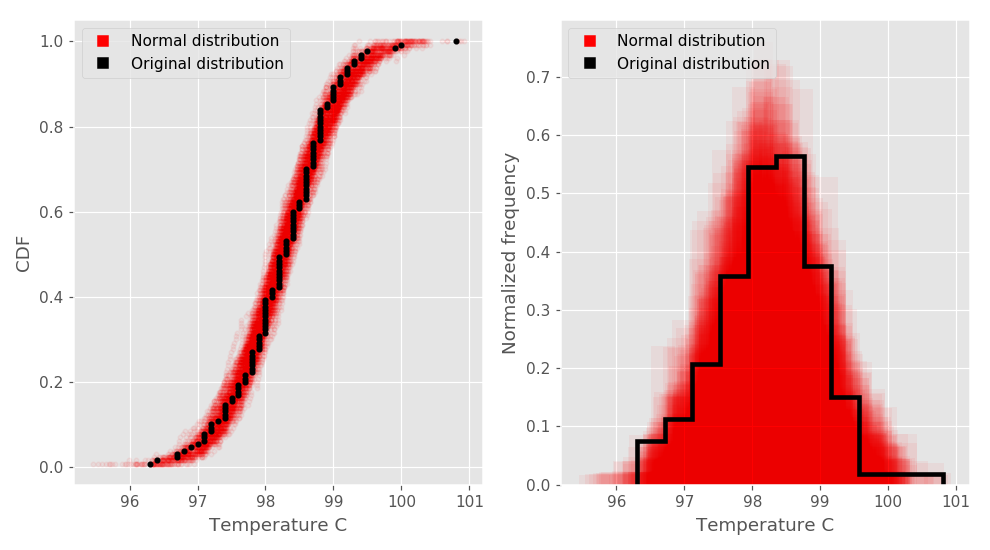

In [6]:
# creating subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (9, 5))

# creating an artist object for making figure legend
legend_artist = (Line2D([0], 
                        [0], 
                        color = 'red', 
                        marker = 's', 
                        markerfacecolor = 'red', 
                        linestyle = 'none'), 
                 Line2D([0], 
                        [0], 
                        color = 'black', 
                        marker = 's', 
                        markerfacecolor = 'black', 
                        linestyle = 'none'))

# storing strings for legend labels
legend_str = ('Normal distribution', 
              'Original distribution')

# creating cdf for temperature
temp_x, temp_y = ecdf(b_temp)

# creating 100 normal distribution using mean sample temperature and std.
for _ in range(100):
    norm_dist = np.random.normal(mean_b_temp, 
                                 std_b_temp,
                                 len(b_temp)) # normal dstribution
    
    norm_x, norm_y = ecdf(norm_dist) # cdf of normal distribution
    
    ax1.plot(norm_x,
             norm_y,
             marker = '.',
             linestyle = 'none',
             color = 'red',
             alpha = 0.05) # plotting normal distribution cdf
    
    ax2.hist(norm_dist, 
             bins = int(np.sqrt(len(norm_dist))),
             normed = True,
             alpha = 0.05,
             color = 'red') # plotting normal distribution histogram

# plotting sample cdf
ax1.plot(temp_x, 
         temp_y,
         marker = '.',
         linestyle = 'none',
         color = 'black') 

# plotting sample histogram
ax2.hist(b_temp, 
         bins = int(np.sqrt(len(b_temp))), 
         normed = True, 
         color = 'black', 
         histtype = 'step', 
         linewidth = 3) 

# setting axis labels and adding legends
ax1.set_xlabel('Temperature C')
ax1.set_ylabel('CDF')
ax1.legend(legend_artist, 
           legend_str, 
           loc = 'upper left')

ax2.set_xlabel('Temperature C')
ax2.set_ylabel('Normalized frequency')
ax2.legend(legend_artist, 
           legend_str, 
           loc = 'upper left')

plt.tight_layout()
plt.show()

**In red is the result for a theoratical normal distribution and in black is the sample temperature distribution. In both the cdf and histogram, it is difficult to distinguish between theoratical and sample distribution. This means that visual analysis shows that the data can be modelled with a normal distribution. But, to increase the confidence in this conclusion, we need to perform a statistical test**

Using normaltest from scipy.stats package to check for normal distribution and printing it's value. Using P-value of 0.01 as the threshold

In [7]:
# calculating p-value. Null hypthesis is that the sample comes from a normal distribution
sample_p_value = st.normaltest(b_temp)[1]

# checking if p-value is less than 0.01. if p < 0.01 null hypothesis can be rejected and vice versa
if sample_p_value < 0.01:
    print('P value of {} shows that the null hypothesis can be rejected' \
          .format(sample_p_value))
else:
    print('P value of {} shows that the null hypothesis can not be rejected' \
          .format(sample_p_value))

P value of 0.2587479863488254 shows that the null hypothesis can not be rejected


**The p-value shows that the null hypothesis ' sample comes from a normal distribution' cannot be rejected. Now, to increase our confidence we will use bootstrapping.**

In [8]:
# using z_vlue from normalcy test as our parameter of interest
sample_z_value = st.normaltest(b_temp)[0]

# creating an empty array of size 10,000
normal_z_value = np.empty(10000)

# Making a normal distribution with sample mean and std and calculating it's z-statistic
for i in range(10000):
    norm_dist = np.random.normal(mean_b_temp,std_b_temp,len(b_temp))
    normal_z_value[i] = st.normaltest(norm_dist)[0] 

In [9]:
# calculating the fraction of z-values >= sample_z_value

sample_p_value = np.sum(normal_z_value >= sample_z_value)/len(normal_z_value) 

# checking if p-value is less than 0.01. if p < 0.01 null hypothesis can be rejected and vice versa
if sample_p_value < 0.01:
    print('P value of {} shows that the null hypothesis can be rejected' \
          .format(sample_p_value))
else:
    print('P value of {} shows that the null hypothesis can not be rejected' \
          .format(sample_p_value))

P value of 0.2548 shows that the null hypothesis can not be rejected


**We get a comparable value to the normalcy test we used before. Therefore, we can conclude that normal distribution can be used to model the data.**

## Part 2: Sample size and independence

***INDEPENDENCE :*** **The observations are from different people so it is resonable to assume that they are independent of each other as the temperature of one person should not affect the temperature of another.**

In [10]:
# sample size
sample_size = len(b_temp)

# print sample size
print('Number of observations = {}'.format(sample_size))

Number of observations = 130


** The sample size is greater than 30. Infact it is 130 which is much greater than 30. What this means is that we can apply the statistical tests that we aim to apply. **

## Part 3: Checking if true body temperature is 98.6 degrees F

Creating 10,000 bootstrap samples and calculating their mean

In [11]:
# creating an empty array of size 10000 to store mean bootstrap values
bootstrap_mean = np.zeros(10000)

# translating temperature array by subtracting sample mean and adding 98.6
translated_b_temp = b_temp - mean_b_temp + 98.6

# creating 10000 bootstrap samples and calculating and storing their means to bootstrap_mean
for i in range(10000):
    
    # randomly sampling the data with replacement
    bootstrap_sample = np.random.choice(translated_b_temp)
    
    # calculating sample mean
    bootstrap_mean[i] = np.mean(bootstrap_sample)

Calculating p-value for the null hypothesis that sample mean = 98.6 degrees F

In [12]:
p_val = np.sum(bootstrap_mean <= mean_b_temp) / 10000

# printing p-value
print('p-value from bootstraping is {}'.format(p_val))

p-value from bootstraping is 0.274


*** Bootstrap result : *** ** P- value of 0.2785 means that we can not reject the null hypothesis that mean temperature = 98.6 degress F. **

We will now use 1 sample t-test. 1 Sample beccause we only have 1 parameter (body temperature) and t-test because we do not know the true population variance. Although as the sample size is large, we can substitute true standard deviation by sample standard deviation. This is because as sample size increases the t-distribution approaches z-distribution.

In [13]:
# using ttest_1samp from scipy.stats. Null hypothesis is that mean body temperature = 98.6 degrees F
p_val = st.ttest_1samp(b_temp, 98.6)

# printing p-value
print('p-value for 1-sample t-test is {}'.format(p_val.pvalue))

p-value for 1-sample t-test is 2.4106320415561276e-07


***T-test result : *** ** As the p-value is very low, we can reject the null hypothesis that mean temperature = 98.6 degrees F. **

Now, we will use z-statistic to calculate the p-value.

In [14]:
# Calculating z-statistic and p-value . Null hypothesis is that mean body temperature = 98.6 degrees F
z_statistic = (98.6-mean_b_temp) / (std_b_temp/np.sqrt(len(b_temp)))

p_val = 2*(1 - st.norm.cdf(z_statistic))

# printing p-value
print('p-value for 1-sample z-test is {}'.format(p_val))

p-value for 1-sample z-test is 4.352315174926957e-08


***Z-test result : *** ** As the p-value is very low, we can reject the null hypothesis that mean temperature = 98.6 degrees F. Moreover, as expected due to the large sample size, both t-statistic and z-statistic give a very low p-value.**

## Part 4: Testing a sample size of 10

Now we will test which test is better to use on a small sample size. To do this we first draw 10 random samples from the data set

In [15]:
# Selecting 10 random samples from the data set
b_temp_10 = np.random.choice(b_temp, 10, replace = False) 

Let's first use t-statistic to test the null hypothesis: Mean temperature = 98.6 degress F

In [16]:
# using ttest_1samp from scipy.stats. Null hypothesis is that mean body temperature = 98.6 degrees F
p_val = st.ttest_1samp(b_temp_10, 98.6)

# printing p-value
print('p-value for 1-sample t-test is {}'.format(p_val.pvalue))

p-value for 1-sample t-test is 0.07611215073595896


***T-test result : *** ** As the p-value is very low, we can reject the null hypothesis that mean temperature = 98.6 degrees F. This is the same conclusion that we drew when we used the entire data set**

Now, let's tey the z-statistic

In [17]:
# Calculating z-statistic and p-value. Null hypothesis is that mean body temperature = 98.6 degrees F
z_statistic = (98.6-np.mean(b_temp_10)) / (np.std(b_temp_10)/np.sqrt(len(b_temp_10)))

p_val = 2*(1 - st.norm.cdf(z_statistic))

# printing p-value
print('p-value for 1-sample z-test is {}'.format(p_val))

p-value for 1-sample z-test is 0.03468996249852907


***Z-test result : *** ** As the p-value is very low, we can reject the null hypothesis that mean temperature = 98.6 degrees F. This is the same conclusion that we drew when we used the entire data set. But, as the number of samples is very small (10) the probability of type II error is much higher. Therefore, in this situation it is better to use the t-test. One way to see this is that when we reduced the sample size the t-statistic changed drastically but the z-statistic doesnot change by much**

## Part 5: At what temperature should we consider someone's temperature to be "abnormal"?

To answer this question we will first use the bootstrap approach.   
To do this we do the following:    
     
     1- Draw 10,000 bootstrap replicates and calculate their mean.    
     2- Find the 2.5th and 97.5th percentile of the data.    
     3- This will be the confidence interval of the mean. Any value outside will be considered as abnormal.    
     4- We will also plot the result.    

In [18]:
# creating an empty array of size 10000 to store mean bootstrap values
bootstrap_mean = np.zeros(10000)

# creating 10000 bootstrap samples and calculating and storing their means to bootstrap_mean
for i in range(10000):
    
    # randomly sampling the data with replacement
    bootstrap_sample = np.random.choice(b_temp)
    
    # calculating sample mean
    bootstrap_mean[i] = np.mean(bootstrap_sample)

# Compute the 95% confidence interval
conf_int = np.percentile(bootstrap_mean, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'degrees F')

95% confidence interval = [ 96.7  99.5] degrees F


<IPython.core.display.Javascript object>


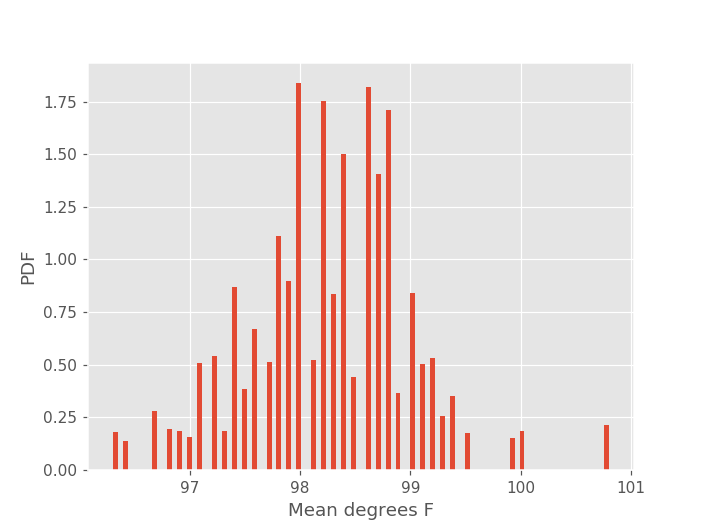

In [19]:
# Plot the histogram of the replicates
fig = plt.figure()
plt.hist(bootstrap_mean, 
         bins = int(np.sqrt(len(bootstrap_mean))),
         normed = True)

plt.xlabel('Mean degrees F')
plt.ylabel('PDF')

# Show the plot
plt.show()

Now we will use the frequentist approach to calculate the confidence interval

In [20]:
conf_int = st.t.interval(0.95,
                         len(b_temp)-1,
                         loc = mean_b_temp,
                         scale = std_b_temp)

# Print the confidence interval
print('95% confidence interval =', conf_int, 'degrees F')

95% confidence interval = (96.804200016139845, 99.69426152232171) degrees F


** Both the approaches give us the same confidene interval for the mean.**

## Part 6: Is body temperature for men and women different?

In [21]:
male_b_temp = df.temperature[df['gender'] == 'M'] # male body temperature
female_b_temp = df.temperature[df['gender'] == 'F'] # female body temperature

Now we calculate the difference in the mean temperature of males and females.

In [22]:
emp_diff = np.mean(female_b_temp) - np.mean(male_b_temp)

# printing the value
print('Mean female body temperature - Mean male body temperature = {} degrees F'.format(emp_diff) )

Mean female body temperature - Mean male body temperature = 0.289230769230727 degrees F


Next, we concatenate the data sets and find their mean. But we donot need to do this as we already have this value in mean_b_temp.   
So we shift the male and female data sets so that their means are equal to the combined mean.

In [23]:
male_b_temp = male_b_temp - np.mean(male_b_temp) + mean_b_temp
female_b_temp = female_b_temp - np.mean(female_b_temp) + mean_b_temp

Next, we draw 10,000 bootsrap samples from the shifted arrays and calculate their mean.

In [24]:
# creating empty array of size 10000 to store mean bootstrap values
male_bootstrap_mean = np.zeros(10000)
female_bootstrap_mean = np.zeros(10000)

# creating 10000 bootstrap samples and calculating and storing their means to bootstrap_mean
for i in range(10000):
    
    # randomly sampling the data with replacement
    male_bootstrap_sample = np.random.choice(male_b_temp)
    female_bootstrap_sample = np.random.choice(female_b_temp)
    
    # calculating sample mean
    male_bootstrap_mean[i] = np.mean(male_bootstrap_sample)
    female_bootstrap_mean[i] = np.mean(female_bootstrap_sample)

Now, we calculate the difference in bootstarp means and plot thier histogram.

<IPython.core.display.Javascript object>


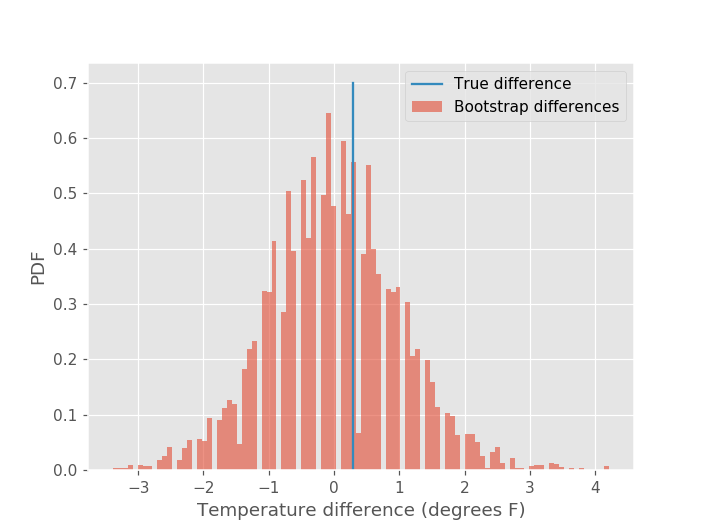

In [25]:
bs_diff = female_bootstrap_mean - male_bootstrap_mean

fig = plt.figure()

plt.hist(bs_diff,
         bins = int(np.sqrt(len(bs_diff))), 
         normed = True,
         alpha = 0.6,
         label = 'Bootstrap differences')

plt.plot([emp_diff, emp_diff],
         [0, 0.7],
         label = 'True difference')

plt.xlabel('Temperature difference (degrees F)')
plt.ylabel('PDF')
plt.legend()
plt.show()

Now to calculate the p-value we calculate the probability of finding a difference of atleast the observed differece.

In [26]:
p_val = np.sum(bs_diff >= emp_diff) / len(bs_diff)

# printing p-value
print('p-value is {}'.format(p_val))

p-value is 0.3915


The p-value of 0.3966 shows that we cannot reject the nul hypothesis which is:    
    
Mean female temperature = mean male temperature

Lastly, we will use t-test to test the same null hypothesis.

In [27]:
p_val = st.ttest_ind(male_b_temp,
                     female_b_temp,
                     equal_var = False)

# printing p-value
print('p-value for 2-sample t-test is {}'.format(p_val.pvalue))

p-value for 2-sample t-test is 0.9999999999997318


The p-value of ~0.99 shows that we can not reject the null hypothesis.

## Part 7: Summary
The following point suumarize the story of this analysis:   
    
    Human body temperature data is normally distributed.   
    True mean body temperature is not 98.6 degrees F, but   
    98.6 degress F cannot be considered abnormal.
    There is statistically no significant difference between male and female body temperature.